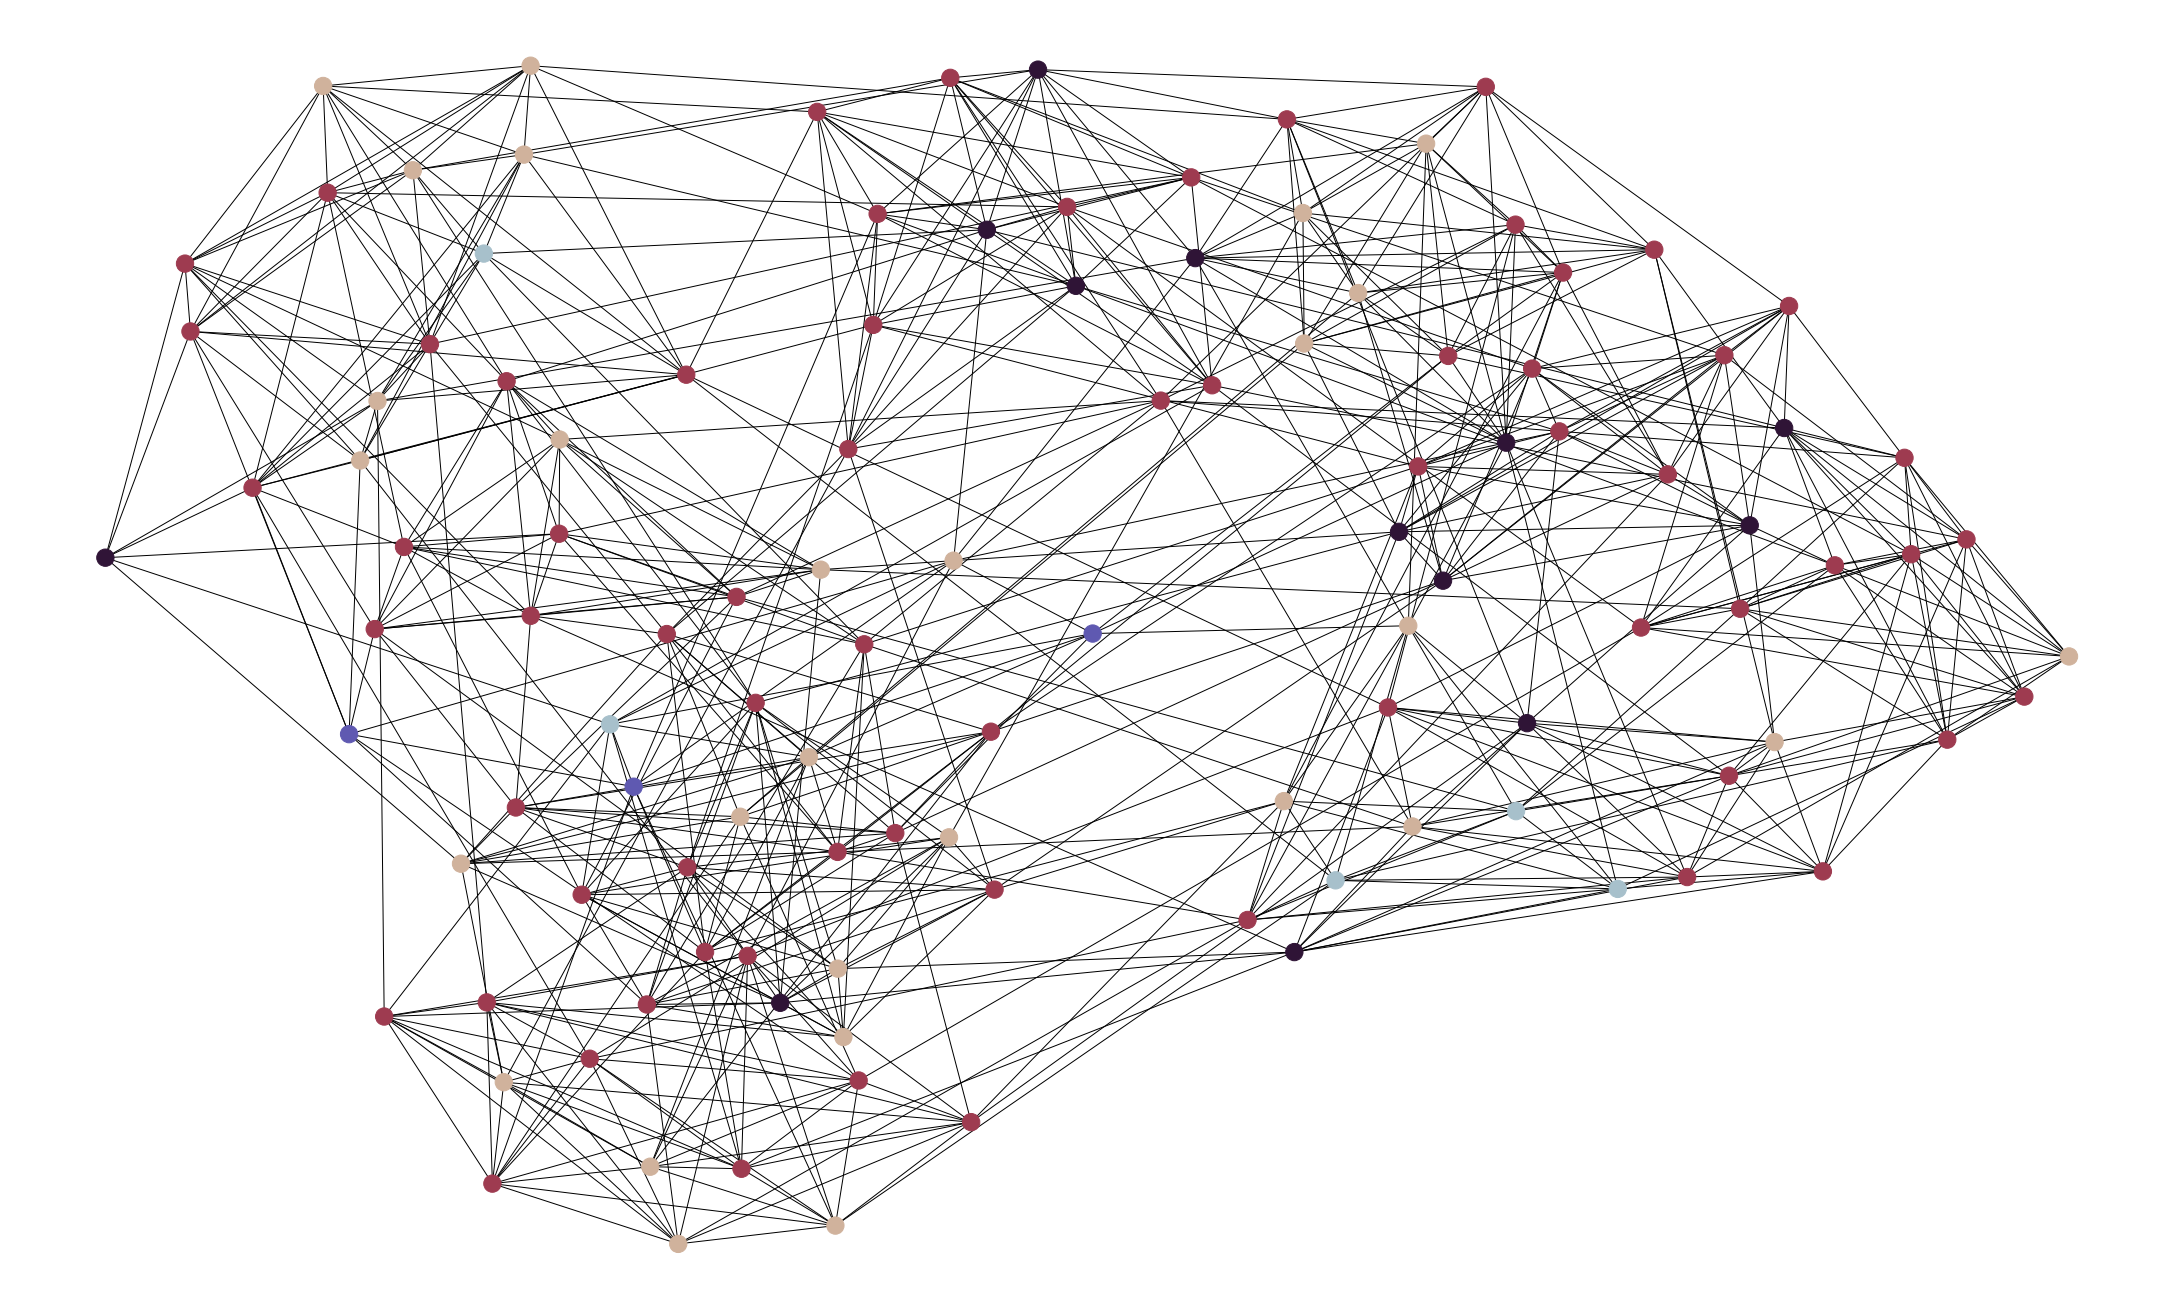

In [12]:
url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"
from six.moves import urllib
import io
import zipfile
import networkx as nx
import matplotlib as mpl
import matplotlib.cm
import matplotlib.pyplot as plt
sock = urllib.request.urlopen(url)  # open URL
s = io.BytesIO(sock.read())  # read into BytesIO "file"
sock.close()

zf = zipfile.ZipFile(s)  # zipfile object
txt = zf.read("football.txt").decode()  # read info file
gml = zf.read("football.gml").decode()  # read gml data
# throw away bogus first line with # from mejn files
gml = gml.split("\n")[1:]
G = nx.parse_gml(gml)  # parse gml data

d = dict(G.degree)
low, *_, high = sorted(d.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.twilight_shifted)

options = {
    "node_size": 50,
    "linewidths": 0,
    "width": 0.1,
}

plt.figure(figsize =(30, 18))
nx.draw(G, 
        nodelist=d,
        node_color=[mapper.to_rgba(i) 
                    for i in d.values()])
plt.show()